In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

**Train Data Loading**

In [2]:
df = pd.read_csv('data/train-test/data_sklearn_models.csv')
df.head()

,storey_range,resale_price,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.449019,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.546558,-0.345484,-0.802967,-0.833389,-0.524994,-0.375705
1,0,12.524526,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.727997,-0.802967,-0.167970,-0.582020,0.258150
2,0,12.560244,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.172367,-0.804500,-0.802967,-0.899113,-0.565965,-0.375705
3,0,12.577636,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.881003,-0.802967,-0.296103,-0.738546,-0.133931
4,2,12.577636,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.804500,-0.802967,-0.044030,-0.637076,0.258150


**Train Data Overview**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206315 entries, 0 to 206314
Data columns (total 48 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   storey_range                       206315 non-null  int64  
 1   resale_price                       206315 non-null  float64
 2   town_BEDOK                         206315 non-null  int64  
 3   town_BISHAN                        206315 non-null  int64  
 4   town_BUKIT BATOK                   206315 non-null  int64  
 5   town_BUKIT MERAH                   206315 non-null  int64  
 6   town_BUKIT PANJANG                 206315 non-null  int64  
 7   town_BUKIT TIMAH                   206315 non-null  int64  
 8   town_CENTRAL AREA                  206315 non-null  int64  
 9   town_CHOA CHU KANG                 206315 non-null  int64  
 10  town_CLEMENTI                      206315 non-null  int64  
 11  town_GEYLANG                       2063

**Data Splitting**

In [4]:
y_values = df['resale_price']
X_values = df.drop('resale_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

165052 41263
165052 41263
(165052, 47) (41263, 47)
(165052,) (41263,)


In [5]:
X_test.columns

Index(['storey_range', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN', 'flat_model_Apartment', 'flat_model_DBSS',
       'flat_model_Improved', 'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A2', 'flat_model_New Generation', 'flat_model_Others',
       'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
       'flat_model_Simplified', 'flat_model_Standard', 'flat_model_Terrace',
       'flat_model_Type S1', 'flat_model_Type S2', 'floor_area_sqm',
       'remaining_lease', 'sora', 'bto_supp

**Load 2024 Data for Prediction**

In [6]:
data_2024 = pd.read_csv('data/train-test/2024-data.csv')
data_2024 = data_2024.drop('year', axis=1)
data_2024.head()

,flat_type,block,street_name,storey_range,lease_commence_date,resale_price,address,latitude,longitude,nearest_mrt_station,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,1,116,ANG MO KIO AVE 4,2,1978,12.570716,116 ANG MO KIO AVE 4,1.373346,103.836459,Yio Chu Kang MRT Station (1327.32m),...,0,0,0,0,-2.211786,-1.607778,2.175147,-0.970227,-0.563772,-0.375705
1,1,510,ANG MO KIO AVE 8,1,1980,12.683858,510 ANG MO KIO AVE 8,1.373401,103.849073,Ang Mo Kio MRT Station (376.66m),...,0,0,0,0,-2.211786,-1.448652,2.175147,-0.345136,-0.596351,-0.340607
2,2,308B,ANG MO KIO AVE 1,0,2012,13.161584,308B ANG MO KIO AVE 1,1.365266,103.844538,Ang Mo Kio MRT Station (758.33m),...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
3,2,308B,ANG MO KIO AVE 1,8,2012,13.384728,308B ANG MO KIO AVE 1,1.365266,103.844538,Ang Mo Kio MRT Station (758.33m),...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
4,2,223,ANG MO KIO AVE 1,1,1978,12.747815,223 ANG MO KIO AVE 1,1.366048,103.838123,Ang Mo Kio MRT Station (1335.16m),...,0,0,0,0,-1.255521,-1.639909,2.175147,-0.940479,-0.753589,0.053899


In [7]:
pred_target = data_2024['resale_price']
pred_set = data_2024.drop('resale_price', axis=1)

**Out-of-bag method**

In [8]:
rf = RandomForestRegressor(random_state = 42, oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [9]:
oob_prediction_test = rf.predict(X_test)
oob_r2 = rf.score(X_test, y_test)
oob_rmse = root_mean_squared_error(y_test, oob_prediction_test)
oob_mse = mean_squared_error(y_test, oob_prediction_test)
oob_mae = mean_absolute_error(y_test, oob_prediction_test)
oob_mape = mean_absolute_percentage_error(y_test, oob_prediction_test)
print('Train data R2 score:', oob_r2)
print("Train data Root Mean Squared Error:", oob_rmse)
print("Train data Mean Squared Error:", oob_mse)
print("Train data Mean Absolute Error:", oob_mae)
print("Train data Mean Absolute Percentage Error:", oob_mape)
print('Train data Out-of-bag score:', rf.oob_score_)

Train data R2 score: 0.9612618826113645
Train data Root Mean Squared Error: 0.06467121816418313
Train data Mean Squared Error: 0.004182366458839369
Train data Mean Absolute Error: 0.047080629434133006
Train data Mean Absolute Percentage Error: 0.0036190378985889
Train data Out-of-bag score: 0.9608897252999029


Visualise training predictions against actual values

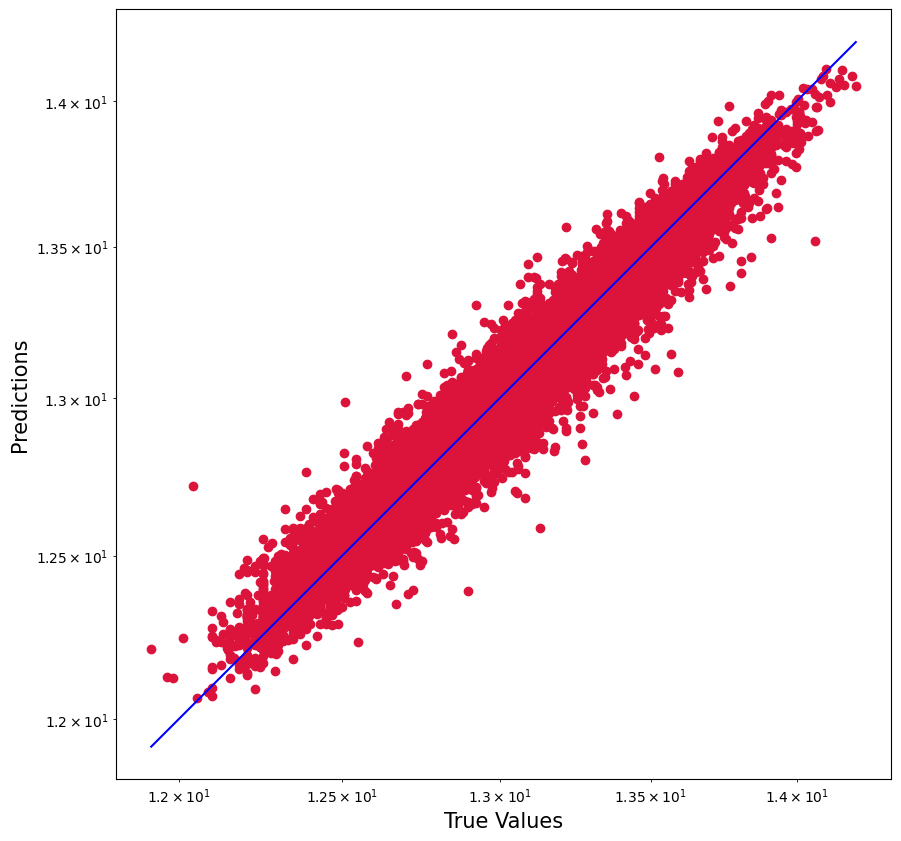

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, oob_prediction_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(oob_prediction_test), max(y_test))
p2 = min(min(oob_prediction_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [12]:
pred_set = pred_set[X_test.columns]

In [13]:
oob_prediction_2024 = rf.predict(pred_set)

In [14]:
oob_pred_r2 = r2_score(pred_target, oob_prediction_2024)
oob_pred_rmse = root_mean_squared_error(pred_target, oob_prediction_2024)
oob_pred_mse = mean_squared_error(pred_target, oob_prediction_2024)
oob_pred_mae = mean_absolute_error(pred_target, oob_prediction_2024)
oob_pred_mape = mean_absolute_percentage_error(pred_target, oob_prediction_2024)
print("Prediction data R2 score:", oob_pred_r2)
print("Prediction data Root Mean Squared Error:", oob_pred_rmse)
print("Prediction data Mean Squared Error:", oob_pred_mse)
print("Prediction data Mean Absolute Error:", oob_pred_mae)
print("Prediction data Mean Absolute Percentage Error:", oob_pred_mape)

Prediction data R2 score: 0.945055471446721
Prediction data Root Mean Squared Error: 0.0698490834037079
Prediction data Mean Squared Error: 0.0048788944523381434
Prediction data Mean Absolute Error: 0.04945196967068725
Prediction data Mean Absolute Percentage Error: 0.0037255874161696025


Visualise 2024 predictions against actual values

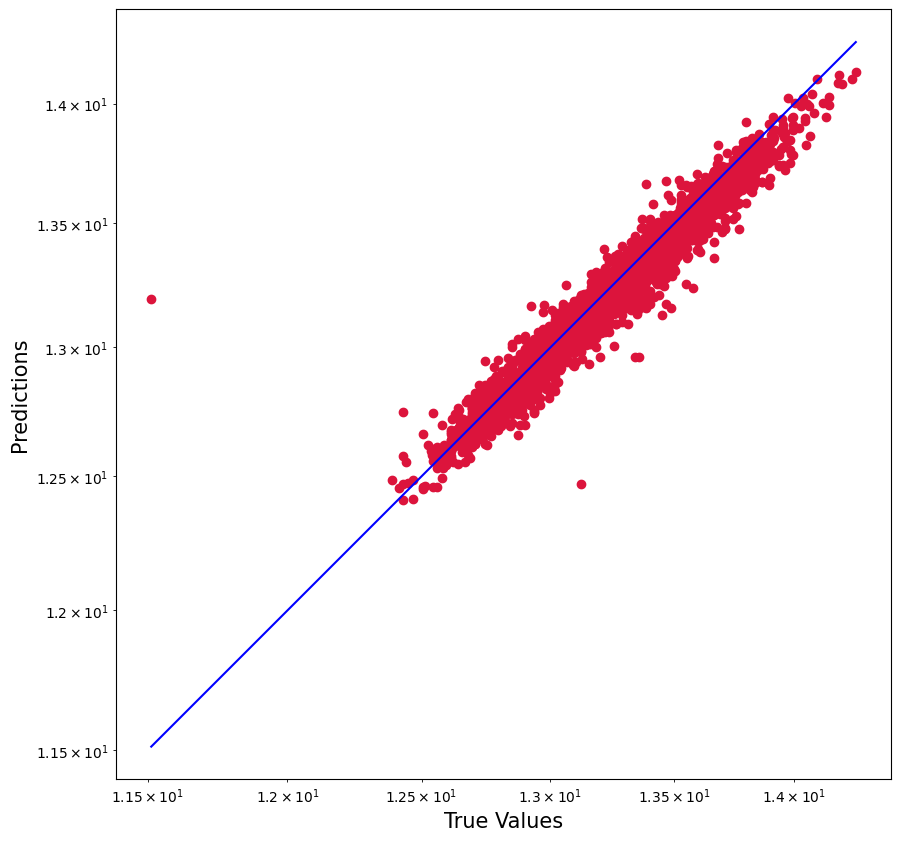

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(pred_target, oob_prediction_2024, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(oob_prediction_2024), max(pred_target))
p2 = min(min(oob_prediction_2024), min(pred_target))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**K-fold Cross Validation**

In [16]:
param_grid = {
    'max_features': [500],
    'max_depth': [20],
    'min_samples_split': [15],
    'min_samples_leaf': [2]}
rfr =GridSearchCV(RandomForestRegressor(n_estimators = 500, n_jobs=-1, random_state=0),
                        param_grid, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
rfr.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=500, n_jobs=-1,
                                             random_state=0),
             param_grid={'max_depth': [20], 'max_features': [500],
                         'min_samples_leaf': [2], 'min_samples_split': [15]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [17]:
print("Best parameters set found on Cross Validation:", rfr.best_params_)
print("Cross Validation R2 score:", rfr.best_score_.round(3))

Best parameters set found on Cross Validation: {'max_depth': 20, 'max_features': 500, 'min_samples_leaf': 2, 'min_samples_split': 15}
Cross Validation R2 score: -0.053


In [18]:
cv_predicted_test = rfr.predict(X_test)
cv_r2 = rfr.score(X_test, y_test)
cv_rmse = root_mean_squared_error(y_test, cv_predicted_test)
cv_mse = mean_squared_error(y_test, cv_predicted_test)
cv_mae = mean_absolute_error(y_test, cv_predicted_test)
cv_mape = mean_absolute_percentage_error(y_test, cv_predicted_test)
print('Training data R2 score:', cv_r2)
print("Training data Root Mean Squared Error:", cv_rmse)
print("Training data Mean Squared Error:", cv_mse)
print("Training data Mean Absolute Error:", cv_mae)
print("Training data Mean Absolute Percentage Error:", cv_mape)

Training data R2 score: -0.05256235393202893
Training data Root Mean Squared Error: 0.07138888569263951
Training data Mean Squared Error: 0.005096373000436751
Training data Mean Absolute Error: 0.05256235393202893
Training data Mean Absolute Percentage Error: 0.0040399340962978605


Visualise training data predictions against actual values

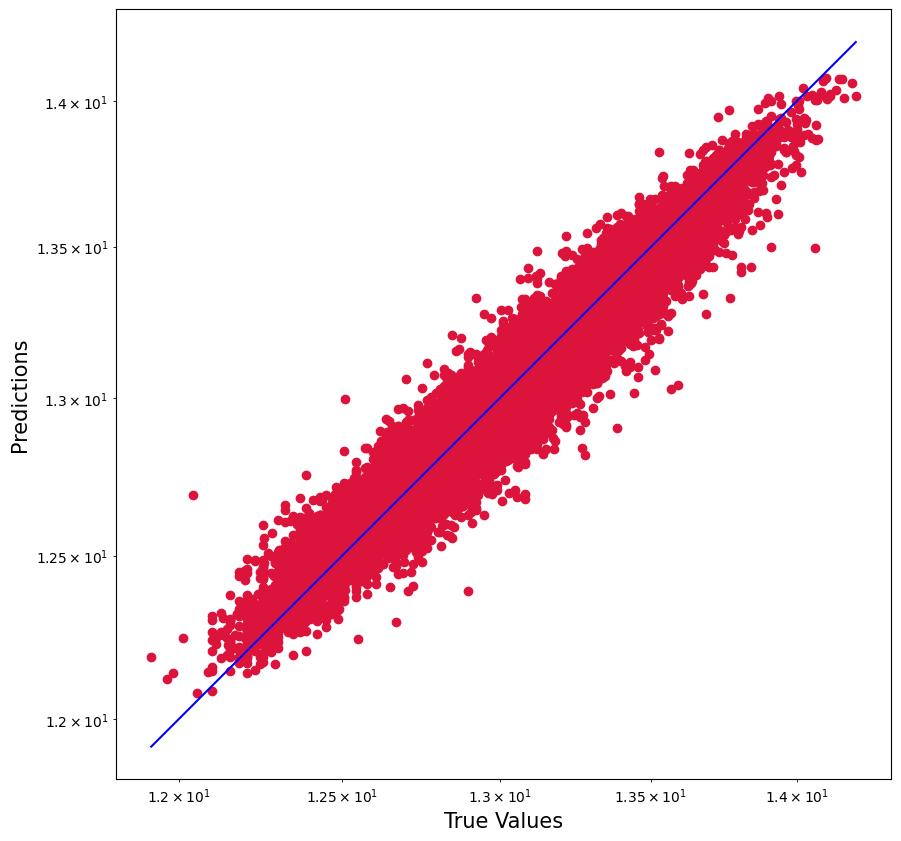

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, cv_predicted_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(cv_predicted_test), max(y_test))
p2 = min(min(cv_predicted_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [20]:
cv_prediction_2024 = rfr.predict(pred_set)

cv_pred_r2 = r2_score(pred_target, cv_prediction_2024)
cv_pred_rmse = root_mean_squared_error(pred_target, cv_prediction_2024)
cv_pred_mse = mean_squared_error(pred_target, cv_prediction_2024)
cv_pred_mae = mean_absolute_error(pred_target, cv_prediction_2024)
cv_pred_mape = mean_absolute_percentage_error(pred_target, cv_prediction_2024)
print("Prediction data R2 score:", cv_pred_r2)
print("Prediction data Root Mean Squared Error:", cv_pred_rmse)
print("Prediction data Mean Squared Error:", cv_pred_mse)
print("Prediction data Mean Absolute Error:", cv_pred_mae)
print("Prediction data Mean Absolute Percentage Error:", cv_pred_mape)

Prediction data R2 score: 0.9397379785178755
Prediction data Root Mean Squared Error: 0.07315101116735329
Prediction data Mean Squared Error: 0.005351070434806245
Prediction data Mean Absolute Error: 0.052203760514478836
Prediction data Mean Absolute Percentage Error: 0.003929336720588494


Visualise 2024 predictions against actual values

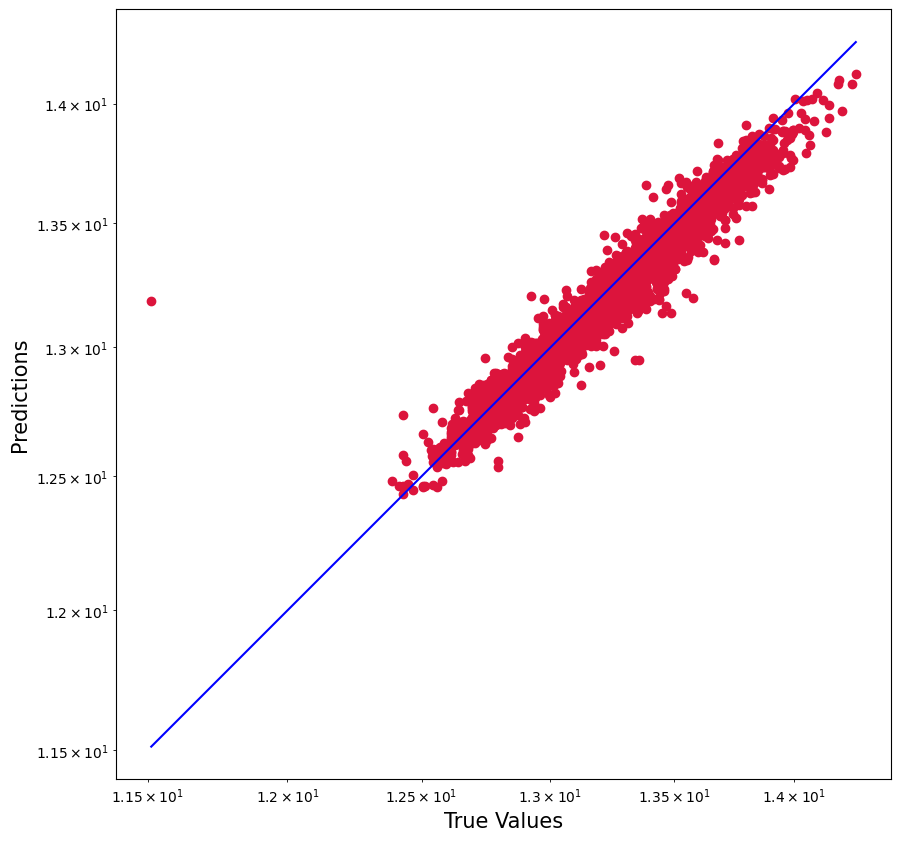

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(pred_target, cv_prediction_2024, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(cv_prediction_2024), max(pred_target))
p2 = min(min(cv_prediction_2024), min(pred_target))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**Comparison of OOB and K-fold Cross Validation**

On Training Data

/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_79514/521528116.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_79514/521528116.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_79514/521528116.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0

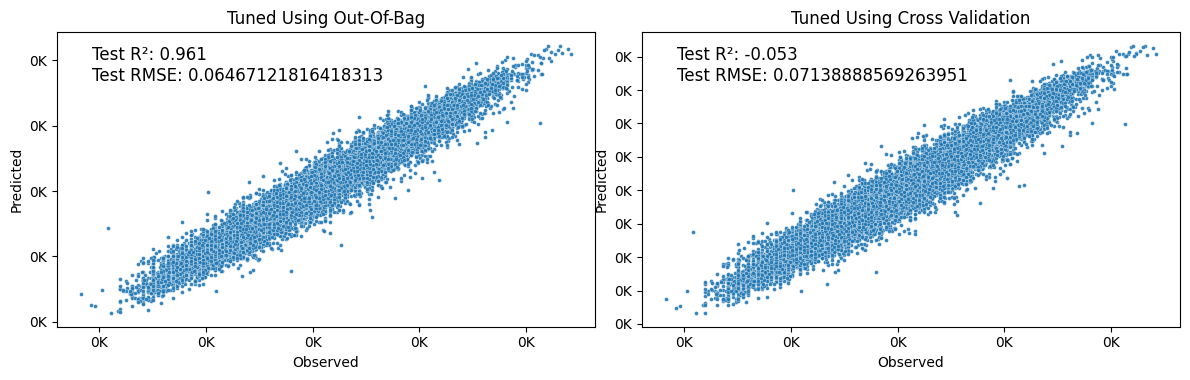

In [22]:
# scatterplots of y (observed) and y (predicted)

fig = plt.figure(figsize=(13,4))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x=y_test, y=oob_prediction_test, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
ax1.annotate('Test R\u00b2: ' + str(round(oob_r2,3)) + '\nTest RMSE: ' + str(oob_rmse), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(x=y_test, y=cv_predicted_test, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000])
ax2.annotate('Test R\u00b2: ' + str(round(cv_r2,3)) + '\nTest RMSE: ' + str(cv_rmse), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

On Prediction Data

/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_79514/4243487350.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_79514/4243487350.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_79514/4243487350.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
/var/folders/pj/3bkj7rdx41j_rvx83ys41k

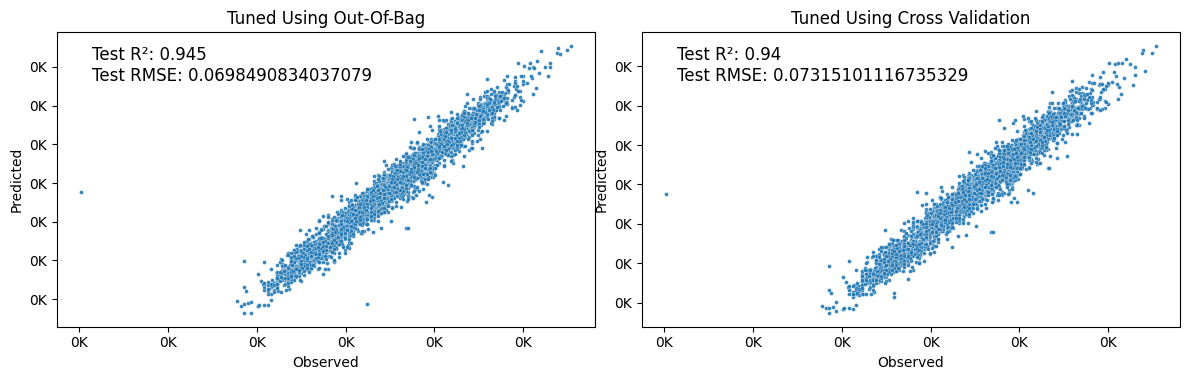

In [23]:
# scatterplots of y (observed) and y (predicted)

fig = plt.figure(figsize=(13,4))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x=pred_target, y=oob_prediction_2024, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
ax1.annotate('Test R\u00b2: ' + str(round(oob_pred_r2,3)) + '\nTest RMSE: ' + str(oob_pred_rmse), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(x=pred_target, y=cv_prediction_2024, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000])
ax2.annotate('Test R\u00b2: ' + str(round(cv_pred_r2,3)) + '\nTest RMSE: ' + str(cv_pred_rmse), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

**Feature Importances**

/var/folders/pj/3bkj7rdx41j_rvx83ys41kth0000gn/T/ipykernel_79514/875511087.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


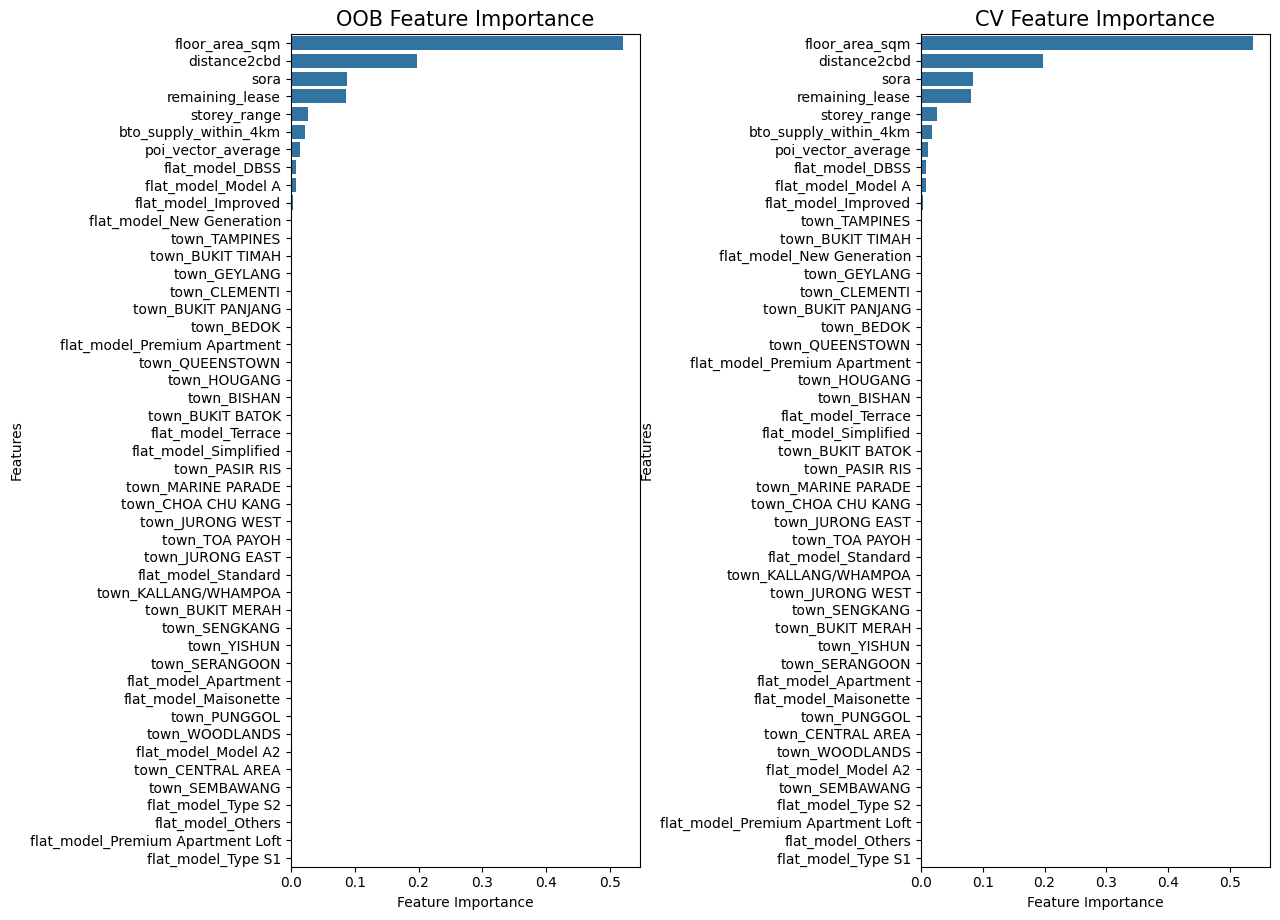

In [24]:
fig = plt.figure(figsize=(14,10))

ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
#plt.xticks(rotation=45, ha='right')
ax1.set_title('OOB Feature Importance', size=15)

ax2 = plt.subplot(122)
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rfr.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
ax2.set_title('CV Feature Importance', size=15)

plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
fig.show()